In [1]:
# Kruskal-Wallis H-test is alternative to one way anova for independent samples.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('kruskal_wallis.csv')
df

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl
5,4.61,ctrl
6,5.17,ctrl
7,4.53,ctrl
8,5.33,ctrl
9,5.14,ctrl


## Summary Statistics

In [4]:
stats = df.groupby('group')['weight'].agg(['count', 'std', 'mean'])
stats

,count,std,mean
group,,,
ctrl,10,0.583091,5.032
trt1,10,0.793676,4.661
trt2,10,0.442573,5.526


## Visualization

<AxesSubplot:xlabel='group', ylabel='weight'>

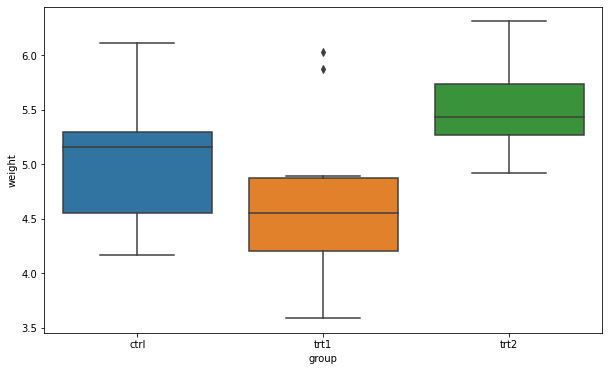

In [5]:
#Create a boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="group", y="weight", data=df)
ax

## Computation

In [6]:
from pingouin import kruskal
kruskal = kruskal(data=df, dv='weight', between='group')
kruskal

,Source,ddof1,H,p-unc
Kruskal,group,2,7.988229,0.018424


## Efect Size

I'm not aware of any package or library that can calculate epsilon square immediately, but the formula is not that complicated:

\begin{equation*}
\epsilon_{KW}^2 = H\times\frac{n+1}{n^2-1}
\end{equation*}

The $H$ is the test-value of the Kruskal-Wallis Test itself, and $n$ the sample size. 

In a separate documentation an explanation can be found on how to obtain the H-value, so see for more details the Kruskal-Wallis H test documentation. Here is quickly the code from that document:

In [7]:
# We can get the H-value from the test results

In [8]:
H = kruskal.H[0]
H

7.988228749443715

In [9]:
n = df['weight'].count()
n

30

In [10]:
# Now we can complete the formula for epsilon square:

In [11]:
esq = H * (n + 1)/(n**2 - 1)
esq

0.27545616377392124

In [12]:
if esq < .01:
    qual = 'Negligible'
elif esq < .04:
    qual = 'Weak'
elif esq < .16:
    qual = 'Moderate'
elif esq < .36:
    qual = 'Relatively strong'
elif esq < .64:
    qual = 'Strong'
else:
    qual = 'Very strong'
    
qual

'Relatively strong'

## Pairwise Comparisons

A significant Kruskal-Wallis test is generally followed up by Dunn’s test to identify which groups are different. It’s also possible to use the Wilcoxon’s test to calculate pairwise comparisons between group levels with corrections for multiple testing.

#### Pairwise comparisons using Dunn’s test:

In [13]:
ctrl = df['weight'][df['group']=='ctrl']
trt1 = df['weight'][df['group']=='trt1']
trt2 = df['weight'][df['group']=='trt2']

In [14]:
data = [ctrl, trt1, trt2]

In [15]:
#perform Dunn's test using a Bonferonni correction for the p-values
import scikit_posthocs as sp
sp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.791053,0.273492
2,0.791053,1.000000,0.015001
3,0.273492,0.015001,1.000000


#### Pairwise comparisons using Wilcoxon’s test:

In [16]:
#perform Wilcoxon's test using a Bonferonni correction for the p-values
import scikit_posthocs as sp
sp.posthoc_wilcoxon(data, p_adjust = 'bonferroni')

,1,2,3
1,1.000000,1.000000,0.392578
2,1.000000,1.000000,0.058594
3,0.392578,0.058594,1.000000


## Report

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

ctrl vs. trt1: Custom statistical test, P_val:7.911e-01
trt1 vs. trt2: Custom statistical test, P_val:1.500e-02
ctrl vs. trt2: Custom statistical test, P_val:2.735e-01


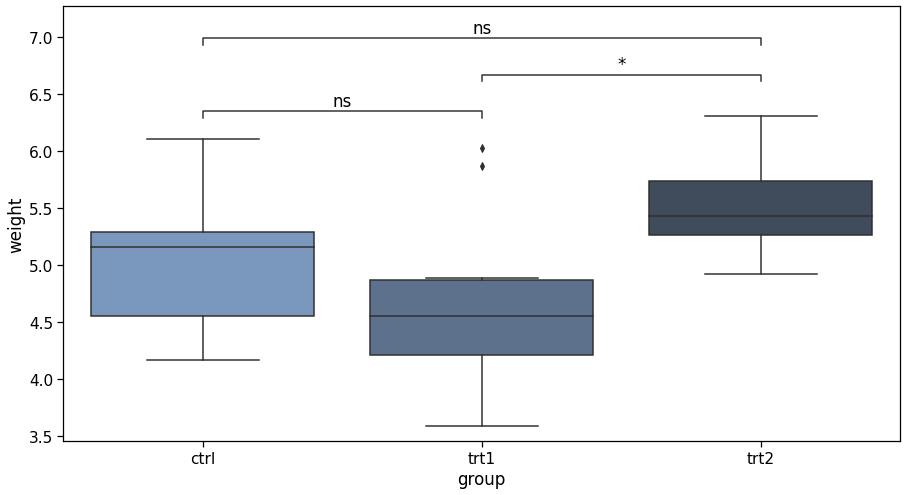

In [17]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest

pvalues = [0.791053, 0.273492, 0.015001]

subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls
plotting_parameters = {
    'data':    df,
    'x':       'group',
    'y':       'weight',
    'palette': subcat_palette[1:]
}

pairs = [('ctrl', 'trt1'),
         ('ctrl', 'trt2'),
         ('trt1', 'trt2')]

with sns.plotting_context('notebook', font_scale = 1.4):
    
    from matplotlib import pyplot as plt
    plt.figure(figsize=(15,8))
    # Plot with seaborn
    ax = sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

    plt.show()